In [1]:
import time
from tools.SVMOneClass import SVMOneClass

param = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for feature in ['all','real','reactive','harmonic']:
    AUC_Scores = []
    times = []

    print('----------')
    print('Features used: ' + feature)
    
    for nu in param:
        mdl = SVMOneClass(feature=feature, suppress_progress=False)
        mdl.nu = nu
        
        start = time.time()
        anomaly_score, y = mdl.cluster_all()
        end = time.time()
        
        sc = round(mdl.auc_score(anomaly_score, y), 3)
        AUC_Scores.append(sc)

        avrg_run = round(( (end - start)/5000 ), 2)
        times.append( avrg_run )

    print(max(AUC_Scores))
    print(AUC_Scores)
    print(times)
    print(param)

    print('----------')

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'AUC')

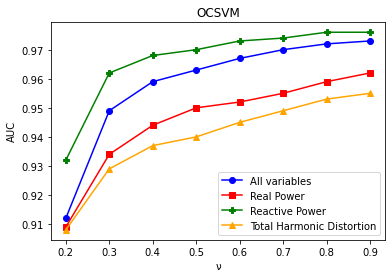

In [8]:
param = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

alll = [0.912, 0.949, 0.959, 0.963, 0.967, 0.97, 0.972, 0.973]
real = [0.909, 0.934, 0.944, 0.95, 0.952, 0.955, 0.959, 0.962]
reactive = [0.932, 0.962, 0.968, 0.97, 0.973, 0.974, 0.976, 0.976]
THD = [0.908, 0.929, 0.937, 0.94, 0.945, 0.949, 0.953, 0.955]

plt.plot(param, alll, 'blue', marker='o', label='All variables')
plt.plot(param, real, 'red', marker='s', label='Real Power')
plt.plot(param, reactive, 'green', marker='P', label='Reactive Power')
plt.plot(param, THD, 'orange', marker='^', label='Total Harmonic Distortion')

plt.legend(loc = 'best')
plt.title("OCSVM")
plt.xlabel('ν')
plt.ylabel('AUC')